In [11]:
#imports
import os

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
plt.style.use('seaborn-whitegrid')

%matplotlib inline  

# ========================================================
# estilos de graficos :
# >>  https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# ========================================================
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-pastel')
# plt.style.use('seaborn-colorblind')
# plt.style.use('seaborn-bright')
# plt.style.use('grayscale')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
# plt.style.use('classic')
# plt.style.use('bmh')

In [12]:
# load dataset
# csv = '../data/_dados_extraidos__k_unordered [001] [0001] [00001] [002] [005].csv'
csv = '../data/_dados_extraidos__k_unordered [1 div N] [001] [002] [005].csv'
df = pd.read_csv(delimiter = ';', filepath_or_buffer = csv)
df.head(10)

,algoritmo,probabilidade_erro,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered
0,merge,0.01,10000,90,962,9.62
1,merge,0.01,10000,66,974,9.74
2,merge,0.01,10000,66,974,9.74
3,merge,0.01,10000,67,1045,10.45
4,merge,0.01,10000,90,962,9.62
5,merge,0.01,10000,53,996,9.96
6,merge,0.01,10000,64,1068,10.68
7,merge,0.01,10000,64,1068,10.68
8,merge,0.01,10000,103,955,9.55
9,merge,0.01,10000,71,1000,10.00


In [3]:
df.describe()

,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered
count,48000.00000,48000.000000,48000.000000,48000.000000
mean,3700.00000,363.471000,402.000104,10.268287
std,4469.94589,1280.251459,706.931659,7.759825
min,100.00000,7.000000,0.000000,0.000000
25%,100.00000,23.000000,9.000000,4.000000
50%,1000.00000,44.000000,55.000000,9.500000
75%,10000.00000,120.000000,277.250000,16.000000
max,10000.00000,10000.000000,2890.000000,28.900000


In [4]:
df.columns

Index(['algoritmo', 'probabilidade_erro', 'size_of_array',
       'largest_sorted_subarray', 'k_unordered_sequence',
       'percentual_k_unordered'],
      dtype='object')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

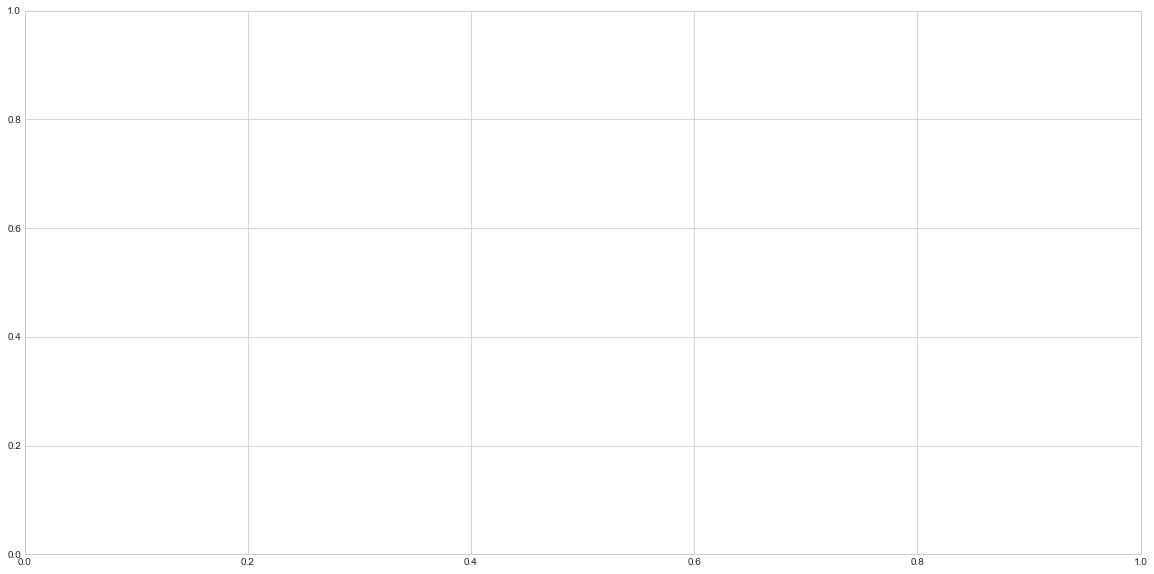

In [29]:
#Visualize data
#Let's Do Some Descriptive Analysis using
fig = plt.figure(figsize=[20,10])
df.describe().T

ax = sns.distplot(df['probabilidade_erro'])

In [127]:
#dimensao da matriz com os dados
print (df.shape)
print (df.index.size, df.columns.size)

(48000, 6)
48000 6


In [128]:
#ordena os dados por: 'algoritmo', 'probabilidade_erro', 'size_of_array'
df.sort_values(['algoritmo', 'probabilidade_erro', 'size_of_array'], ascending = [True, True, True], inplace = True)
df.head()

,algoritmo,probabilidade_erro,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered
7000,bubble,0.01,100,78,2,2.0
7001,bubble,0.01,100,61,5,5.0
7002,bubble,0.01,100,61,5,5.0
7003,bubble,0.01,100,76,3,3.0
7004,bubble,0.01,100,61,5,5.0


In [129]:
#quantas linhas existem para cada algoritmo
grp_algoritmo = df.groupby('algoritmo').size()
grp_algoritmo

algoritmo
bubble       12000
insertion    12000
merge        12000
quick        12000
dtype: int64

In [130]:
#quantas linhas existem para cada 'algoritmo', 'probabilidade_erro', 'size_of_array'
grp_algoritmo = df.groupby(['algoritmo', 'probabilidade_erro', 'size_of_array']).size()
grp_algoritmo

algoritmo  probabilidade_erro  size_of_array
bubble     0.01                100              1000
                               1000             1000
                               10000            1000
           0.02                100              1000
                               1000             1000
                               10000            1000
           0.05                100              1000
                               1000             1000
                               10000            1000
           1/n                 100              1000
                               1000             1000
                               10000            1000
insertion  0.01                100              1000
                               1000             1000
                               10000            1000
           0.02                100              1000
                               1000             1000
                               10000            1000
 

In [131]:
#quantas linhas existem para cada 'probabilidade_erro'
grp_prob_erro = df.groupby(['probabilidade_erro']).size()
grp_prob_erro

probabilidade_erro
0.01    12000
0.02    12000
0.05    12000
1/n     12000
dtype: int64

In [132]:
#quantas linhas existem para cada 'probabilidade_erro','algoritmo','size_of_array'
grp_prob_erro = df.groupby(['probabilidade_erro','algoritmo','size_of_array']).size()
grp_prob_erro

probabilidade_erro  algoritmo  size_of_array
0.01                bubble     100              1000
                               1000             1000
                               10000            1000
                    insertion  100              1000
                               1000             1000
                               10000            1000
                    merge      100              1000
                               1000             1000
                               10000            1000
                    quick      100              1000
                               1000             1000
                               10000            1000
0.02                bubble     100              1000
                               1000             1000
                               10000            1000
                    insertion  100              1000
                               1000             1000
                               10000            1000
 

In [133]:
#quantas linhas existem para cada 'size_of_array'
grp_size = df.groupby(['size_of_array']).size()
grp_size

size_of_array
100      16000
1000     16000
10000    16000
dtype: int64

In [134]:
#quantas linhas existem para cada 'probabilidade_erro', 'size_of_array','algoritmo'
grp_prob_erro = df.groupby(['probabilidade_erro', 'size_of_array','algoritmo']).size()
grp_prob_erro

probabilidade_erro  size_of_array  algoritmo
0.01                100            bubble       1000
                                   insertion    1000
                                   merge        1000
                                   quick        1000
                    1000           bubble       1000
                                   insertion    1000
                                   merge        1000
                                   quick        1000
                    10000          bubble       1000
                                   insertion    1000
                                   merge        1000
                                   quick        1000
0.02                100            bubble       1000
                                   insertion    1000
                                   merge        1000
                                   quick        1000
                    1000           bubble       1000
                                   insertion    1000
 

In [135]:
# numero de amostras de cada algoritmo
temp = df.groupby('algoritmo').size()
temp

algoritmo
bubble       12000
insertion    12000
merge        12000
quick        12000
dtype: int64

In [155]:
# numero de amostras de cada probabilidade_erro
temp = df.groupby('probabilidade_erro').size()
temp = pd.DataFrame(data=temp)
temp


,0
probabilidade_erro,
0.01,12000
0.02,12000
0.05,12000
1/n,12000


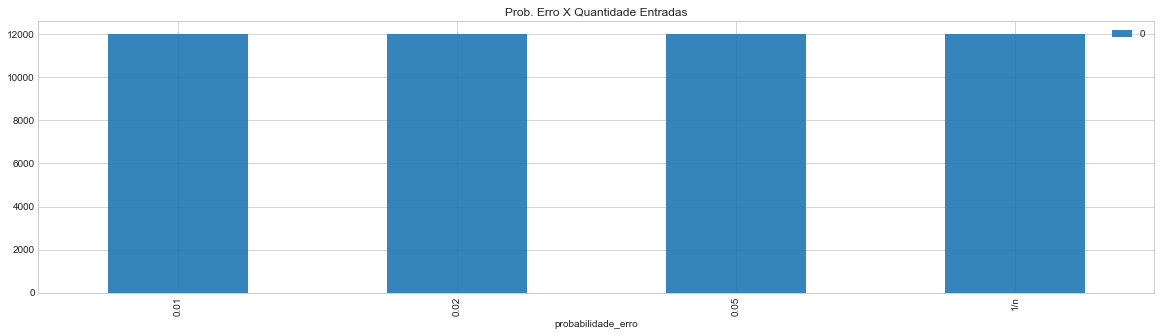

In [190]:
temp.plot(kind = 'bar', style = 'b', alpha = 0.9, title = "Prob. Erro X Quantidade Entradas", figsize=[20,5] )

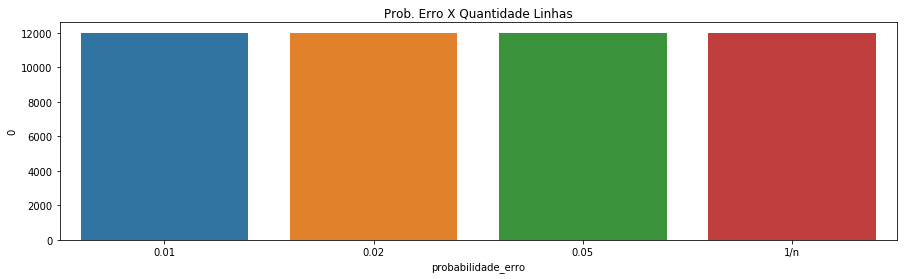

In [254]:
sns.reset_orig()
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-pastel')
# plt.style.use('seaborn-colorblind')
# plt.style.use('seaborn-bright')
# plt.style.use('grayscale')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')


fig = plt.figure(figsize=[15,4])
plt.title('Prob. Erro X Quantidade Linhas')
sns.barplot(data=temp, x=temp.index, y=temp.columns[0]) #, hue=temp.index )



In [137]:
# numero de amostras de cada size_of_array
temp = df.groupby('size_of_array').size()
temp

size_of_array
100      16000
1000     16000
10000    16000
dtype: int64

In [138]:
#quantas linhas existem para cada 'size_of_array', 'probabilidade_erro','algoritmo'
temp = df.groupby(['size_of_array', 'probabilidade_erro']).size()
temp

size_of_array  probabilidade_erro
100            0.01                  4000
               0.02                  4000
               0.05                  4000
               1/n                   4000
1000           0.01                  4000
               0.02                  4000
               0.05                  4000
               1/n                   4000
10000          0.01                  4000
               0.02                  4000
               0.05                  4000
               1/n                   4000
dtype: int64

In [139]:
fig = plt.figure(figsize=[20,30])
# temp = temp.add_suffix('_Count').reset_index()
temp = pd.DataFrame(data=temp, columns=temp.columns )


# temp.plot(kind = 'bar', style = 'b', alpha = 0.4, title = "Total Values for Country")
# sns.barplot(data=temp, x=temp['probabilidade_erro'])
#temp['probabilidade_erro']
# ax = sns.distplot(temp)

In [22]:
#calcula a porcentagem do maior array
s = (df['largest_sorted_subarray'] / df['size_of_array']  * 100 * 100) / 100
s.head()

0    0.90
1    0.66
2    0.66
3    0.67
4    0.90
dtype: float64

In [15]:
r = df
# r['percentual_maior_array'] = s


,algoritmo,probabilidade_erro,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered,percentual_maior_array
0,merge,0.01,10000,90,962,9.62,0.90
1,merge,0.01,10000,66,974,9.74,0.66
2,merge,0.01,10000,66,974,9.74,0.66
3,merge,0.01,10000,67,1045,10.45,0.67
4,merge,0.01,10000,90,962,9.62,0.90


In [23]:
df.head()

,algoritmo,probabilidade_erro,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered,percentual_maior_array
0,merge,0.01,10000,90,962,9.62,0.90
1,merge,0.01,10000,66,974,9.74,0.66
2,merge,0.01,10000,66,974,9.74,0.66
3,merge,0.01,10000,67,1045,10.45,0.67
4,merge,0.01,10000,90,962,9.62,0.90


In [27]:
df['percentual_maior_array'] = df['percentual_maior_array'].round(2)

In [28]:
df.to_csv('_dados_para_analisar.csv', index=False, sep=';')